In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib as mpl
import sys
%matplotlib inline
%config InlineBackend.figure_format = 'svg'   #uses high resolution vectorized output
plt.rcParams['figure.figsize'] = (9, 7)


In [42]:
print('Python: ', sys.version)
print('OS: ',sys.platform)
print('pandas version: ', pd.__version__)
print('matplotlib version: ', mpl.__version__)

Python:  3.6.2 |Continuum Analytics, Inc.| (default, Jul 20 2017, 12:30:02) [MSC v.1900 64 bit (AMD64)]
OS:  win32
pandas version:  0.20.3
matplotlib version:  2.0.2


TS = 53.6 MPa


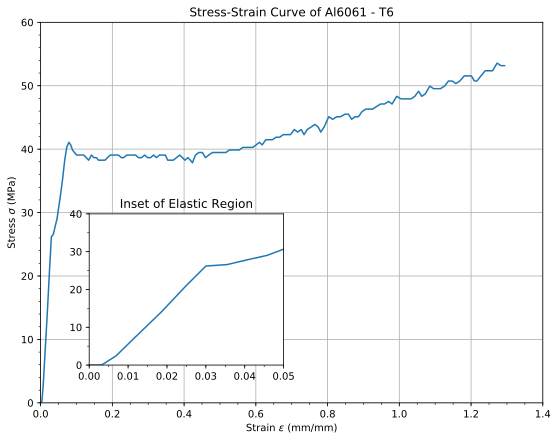

In [43]:
df = pd.read_csv('data.csv', sep=',',header=None, skiprows=1)
#print(df)


#plt.plot(df[1], df[2])
#plt.show()

delta_L = np.array(df[1])*1000  
#print(delta_L)
force = np.array(df[2])
#print(force)

# sample parameters
d = 1.778     # diameter of sample in mm
A0 = np.pi*(d/2)**2 # original cross-sectional area of sample in mm^2
L0 = 18.002   # original gauge length of sample (lenth of narrowest section)

# calcuate stress and strain
stress = (force/A0)
strain = delta_L/L0

# calculate the tensile strength (TS)
TS = max(stress) # Tensile Strength (TS)
TS = round(TS,1) # round to 3 sig figs
print('TS =', TS, 'MPa')

# plot the stress strain curve
fig, ax1= plt.subplots(1,1)
plt.plot(strain,stress)
plt.xlabel('Strain $\epsilon$ (mm/mm)')
plt.ylabel('Stress $\sigma$ (MPa)')
plt.title('Stress-Strain Curve of Al6061 - T6')
plt.axis([0, 1.4, 0, 60])
plt.grid(True)
x_minorLocator = MultipleLocator(0.05) #set x-axis minor ticks every 0.05 mm/mm
ax1.xaxis.set_minor_locator(x_minorLocator)
y_minorLocator = MultipleLocator(2) #set y-axis minor ticks every 2 MPa
ax1.yaxis.set_minor_locator(y_minorLocator)
#textstr = r'$TS=%.1f \ MPa$'%(TS)
#bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#plt.text(0.8, 55, textstr, fontsize=14, bbox=bbox_props)

# this is the inset axes over the main axes
ax2 = plt.axes([0.2, 0.2, .3, .3], facecolor='w')
plt.plot(strain, stress)
plt.title('Inset of Elastic Region')
plt.xlim(0, 0.05)
plt.ylim(0, 40)
x_minorLocator = MultipleLocator(0.005) #set x-axis minor ticks every 0.005 mm/mm
ax2.xaxis.set_minor_locator(x_minorLocator)
y_minorLocator = MultipleLocator(5) #set y-axis minor ticks every 5 MPa
ax2.yaxis.set_minor_locator(y_minorLocator)
plt.show()

fig.savefig('stress_strain_curve.pdf', bbox_inches='tight')

In [47]:
df = pd.read_csv('stress_strain_data.csv', sep=',', header=None, skiprows=0)
strain = df[0]
stress = df[1]

TS = 413.5 MPa


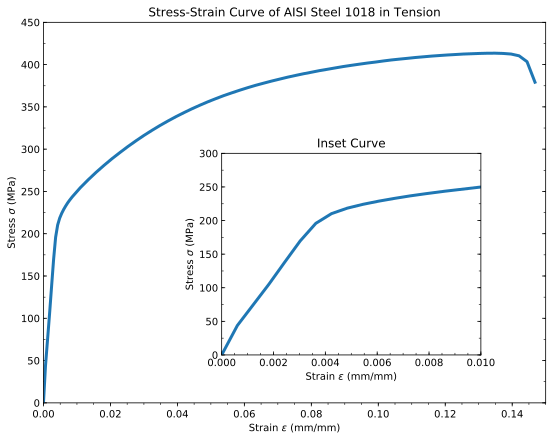

In [48]:
# calculate the tensile strength (TS)
TS = max(stress) # Tensile Strength (TS)
TS = round(TS,1) # round to 3 sig figs
print('TS =', TS, 'MPa')

# plot the stress strain curve
fig, ax1= plt.subplots(1,1)
plt.plot(strain,stress, linewidth=3.0)
plt.xlabel('Strain $\epsilon$ (mm/mm)')
plt.ylabel('Stress $\sigma$ (MPa)')
plt.title('Stress-Strain Curve of AISI Steel 1018 in Tension')
plt.axis([0, 0.15, 0, 450])
#plt.grid(True)
x_minorLocator = MultipleLocator(0.005) #set x-axis minor ticks every 0.05 mm/mm
ax1.xaxis.set_minor_locator(x_minorLocator)
y_minorLocator = MultipleLocator(25) #set y-axis minor ticks every 2 MPa
ax1.yaxis.set_minor_locator(y_minorLocator)
ax1.tick_params(axis='y', which='both', right='on', direction='in')
#textstr = r'$TS=%.1f \ MPa$'%(TS)
#bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#plt.text(0.8, 55, textstr, fontsize=14, bbox=bbox_props)

# this is the inset axes over the main axes
ax2 = plt.axes([0.4, 0.22, .4, .4], facecolor='w')
plt.plot(strain, stress, linewidth=3.0)
plt.xlabel('Strain $\epsilon$ (mm/mm)')
plt.ylabel('Stress $\sigma$ (MPa)')
plt.title('Inset Curve')
plt.xlim(0, 0.01)
plt.ylim(0, 300)
x_minorLocator = MultipleLocator(0.0005) #set x-axis minor ticks every 0.005 mm/mm
ax2.xaxis.set_minor_locator(x_minorLocator)
y_minorLocator = MultipleLocator(25) #set y-axis minor ticks every 5 MPa
ax2.yaxis.set_minor_locator(y_minorLocator)
ax2.tick_params(axis='y', which='both', right='on', direction='in')
ax2.tick_params(axis='x', which='both', direction='in')
plt.show()

In [49]:
fig.savefig('stress_strain_curve_steel_1018.pdf', bbox_inches='tight')